In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
%config Completer.use_jedi = False ## 자동완성(tab)명령어가 듣지 않을 때 해결 코드

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmb10',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmtt10',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmss10',
 'cmr10',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'Arial',
 'Verdana',
 'Segoe UI',
 'Trebuchet MS',
 'Candara',
 'SimSun',
 'Microsoft Sans Serif',
 'Microsoft PhagsPa',
 'Arial',
 'Segoe UI',
 'Segoe Print',
 'Comic Sans MS',
 'MingLiU-ExtB',
 'Gadugi',
 'Candara',
 'Segoe UI',
 'Trebuchet MS',
 'Impact',
 'Malgun Gothic',
 'Cambria',
 'Verdana',
 'Times New Roman',
 'Consolas',
 'Const

In [ ]:
# ▶ 한글 폰트 설정하기
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

## 데이터 불러오기 
df_몇년_몇월 << 형태로 지정 ex) df_2016_01

In [3]:
globals_dict = globals()

start_year = 2016
end_year = 2024

# 2016년 1월부터 2024년 6월까지 for loop
for year in range(start_year, end_year+1):
    for month in range(1, 13):
        # 2024년 7월 이후는 제외
        if year == end_year and month > 6:
            break
        # 년도와 월을 문자열로 변환
        years_month = f"{year}_{str(month).zfill(2)}"

        # xls 파일 경로 (년월에 따라 다른 파일을 불러오는 경우)
        filename = f"{year}/{year}{str(month).zfill(2)}_교통카드_통계자료.xls"

        # xls 파일 불러오기
        df = pd.read_excel(filename, sheet_name='지하철 노선별 역별 이용현황')
        
        df['승차승객수'] = df['승차승객수'].str.replace(',', '').astype(int)
        df['하차승객수'] = df['하차승객수'].str.replace(',', '').astype(int)
        
        # 전역 변수로 저장
        globals_dict[f'df_{years_month}'] = df

In [74]:
# 데이터 check
df_2016_05

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2023-01,1호선,150,서울역,1399616,1335301,2023-02-03 10:11:11
1,2023-01,1호선,151,시청,642685,653665,2023-02-03 10:11:11
2,2023-01,1호선,152,종각,1010906,979482,2023-02-03 10:11:11
3,2023-01,1호선,153,종로3가,719090,663550,2023-02-03 10:11:11
4,2023-01,1호선,154,종로5가,645702,633546,2023-02-03 10:11:11
...,...,...,...,...,...,...,...
607,2023-01,신림선,4407,당곡,115508,114253,2023-02-03 10:11:11
608,2023-01,신림선,4408,신림,43148,59109,2023-02-03 10:11:11
609,2023-01,신림선,4409,서원,90301,76790,2023-02-03 10:11:11
610,2023-01,신림선,4410,서울대벤처타운,224978,213713,2023-02-03 10:11:11


### 년도별 누적 이용자수 dataframe

In [27]:
# # 예시 DataFrame 생성 (df_2016_01 ~ df_2016_12)

# # 모든 월별 DataFrame을 리스트에 추가
# dfs_2016 = [df_2016_01, df_2016_02, df_2016_03, df_2016_04, 
#            df_2016_05, df_2016_06, df_2016_07, df_2016_08,
#            df_2016_09, df_2016_10, df_2016_11, df_2016_12]

# # 모든 DataFrame을 하나로 병합
# merged_df_2016 = pd.concat(dfs_2016)

# # '역ID' 또는 '지하철역'을 기준으로 그룹화하여 누적 승객수 계산
# annual_stats_2016 = merged_df_2016.groupby(['호선명', '역ID', '지하철역']).agg({
#     '승차승객수': 'sum',
#     '하차승객수': 'sum'
# }).reset_index()
# annual_stats_2016['승하차승객수'] = annual_stats_2016['승차승객수'] + annual_stats_2016['하차승객수']

# print(annual_stats_2016.sort_values(by='승하차승객수', ascending=False)[:20])

In [32]:
globals_dict = globals()

# 년도별로 병합된 DataFrame을 저장할 딕셔너리 생성
annual_dfs = {}

# 2016년 1월부터 2024년 6월까지 for loop
for year in range(start_year, end_year+1):
    # 해당 년도의 DataFrame을 저장할 리스트 생성
    dfs = []
    
    for month in range(1, 13):
        # 2024년 7월 이후는 제외
        if year == end_year and month > 6:
            break
        # 년도와 월을 문자열로 변환
        years_month = f"{year}_{str(month).zfill(2)}"
        df = globals_dict[f'df_{years_month}']
        dfs.append(df)

    merged_df = pd.concat(dfs)
    # 기존의 조건부는 '호선명', '역ID', '지하철역' 이였으나, 중간에 역id가 바뀌는 이슈로 총합계산에 어려움이 따름
    annual_stats = merged_df.groupby(['호선명', '지하철역']).agg({
        '승차승객수': 'sum',
        '하차승객수': 'sum'
    }).reset_index()

    annual_stats['승하차승객수'] = annual_stats['승차승객수'] + annual_stats['하차승객수']
    annual_dfs[year] = annual_stats

# 결과 출력
for year, df in annual_dfs.items():
    print(f"\n{year}년 승하차 승객수:")
    print(df.sort_values(by='승하차승객수', ascending=False)[:20])


2016년 승하차 승객수:
     호선명      지하철역     승차승객수     하차승객수    승하차승객수
11   2호선        강남  36310545  36741771  73052316
70   2호선      홍대입구  28076980  29973476  58050456
44   2호선        신림  26714165  26127305  52841470
17   2호선   구로디지털단지  23137156  23194811  46331967
43   2호선       신도림  22996911  22924567  45921478
61   2호선        잠실  23047376  21417743  44465119
2    1호선       서울역  22937560  20154792  43092352
75   3호선     고속터미널  20939569  21690221  42629790
401  경부선       영등포  18864916  20035258  38900174
48   2호선        신촌  18819240  19141711  37960951
59   2호선     을지로입구  18868826  18770053  37638879
37   2호선        선릉  19833945  17023688  36857633
14   2호선      건대입구  16706519  18260186  34966705
51   2호선        역삼  16338612  18083441  34422053
397  경부선        수원  16658762  17730661  34389423
30   2호선        사당  15831965  17944650  33776615
6    1호선        종각  17178472  16268446  33446918
127  4호선  수유(강북구청)  16942518  16434517  33377035
140  4호선        혜화  15863487  16606436  32469923
117 

In [33]:
# 예시) 특정 년도 합산확인 annual_dfs[년도] << 기입년도 데이터 확인가능
annual_dfs[2023]['승하차승객수'].sum()

4893526480

In [72]:
annual_years = []
for year in range(start_year, end_year+1):
    # 해당 년도의 DataFrame을 저장할 리스트 생성
    annual_years.append(annual_dfs[year]['승차승객수'].sum())

print(f"2016년부터 2024년 까지 누적 이용객은 : {annual_years}명 입니다")

2014년부터 2024년 까지 누적 이용객은 : [2658363955, 2646453453, 2662713279, 2716706229, 1968367410, 2007773132, 2240951400, 2451933346, 1260617634]명 입니다


### 지하철_노선별_역별_이용현황_plot

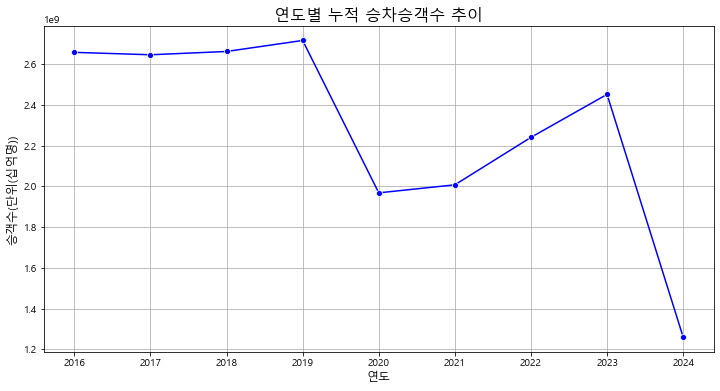

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(annual_years, marker='o', color='b')
plt.title('연도별 누적 승차승객수 추이', fontsize=16)
plt.xticks(np.arange(end_year-start_year+1), ['2016', '2017', '2018', '2019', '2020',
                                            '2021', '2022', '2023', '2024'])
plt.grid(True)
plt.xlabel('연도', fontsize=12)
plt.ylabel('승객수(단위(십억명))', fontsize=12)

plt.savefig('연도별 누적 승차승객수 추이.png')
plt.show()